In [2]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [4]:
# View  the top 6 lines of attribute table of data
world.head(6)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."


<class 'shapely.geometry.multipolygon.MultiPolygon'>
177


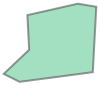

In [13]:
print(type(world.geometry[0]))
print(len(world))
world.geometry[175]


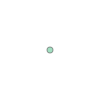

In [15]:
from shapely.geometry import Point, Polygon, LineString

p = Point(4, 5)
p

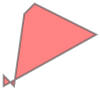

In [20]:
polygon = Polygon([(1, 1), (1,2),  (2, 1),(3,8),(4,9),(10,6)])
polygon

In [24]:
#create a geopandas dataframe
gdf = gpd.GeoDataFrame({
      'geometry': Polygon([(1, 1), (1,2), (2,2), (2, 1)]),
      'attribute1(geometry)': ['Polygon'],
      'attribute2(temp)': [20]})
gdf

,geometry,attribute1(geometry),attribute2(temp)
0,"POLYGON ((1.00000 1.00000, 1.00000 2.00000, 2....",Polygon,20


In [26]:
gdf.geom_type

0    Polygon
dtype: object

In [28]:
gdf.bounds

,minx,miny,maxx,maxy
0,1.0,1.0,2.0,2.0


In [30]:
gdf.area

0    1.0
dtype: float64

In [32]:
polygon.distance(p)

0.0

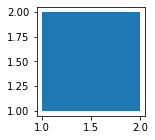

In [34]:
gdf.plot(figsize = (2,2))

In [36]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

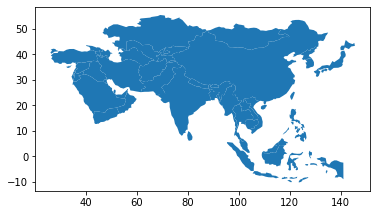

In [38]:
asia=world[world['continent'] == "Asia"]
asia.plot()

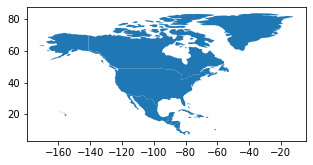

In [50]:
america=world[world['continent'] == "North America"]
america.plot( figsize = ( 5 , 10))

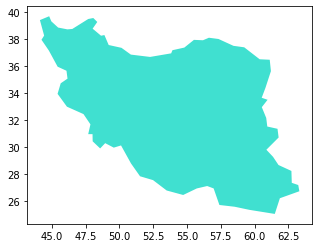

In [69]:
iran=world[world['name'] == "Iran"]
iran.plot(color='turquoise')

In [70]:
iran['pop_est']

107    82021564
Name: pop_est, dtype: int64

In [73]:
for index, row in asia.iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:.3f}".format(asia['name'][index], poly_area))

Polygon area at index Kazakhstan is: 330.587
Polygon area at index Uzbekistan is: 49.959
Polygon area at index Indonesia is: 148.136
Polygon area at index Timor-Leste is: 1.209
Polygon area at index Israel is: 2.187
Polygon area at index Lebanon is: 0.984
Polygon area at index Palestine is: 0.480
Polygon area at index Jordan is: 8.439
Polygon area at index United Arab Emirates is: 7.095
Polygon area at index Qatar is: 1.016
Polygon area at index Kuwait is: 1.545
Polygon area at index Iraq is: 42.229
Polygon area at index Oman is: 26.803
Polygon area at index Cambodia is: 15.169
Polygon area at index Thailand is: 42.941
Polygon area at index Laos is: 19.602
Polygon area at index Myanmar is: 59.157
Polygon area at index Vietnam is: 28.553
Polygon area at index North Korea is: 13.278
Polygon area at index South Korea is: 9.955
Polygon area at index Mongolia is: 182.198
Polygon area at index India is: 277.925
Polygon area at index Bangladesh is: 11.857
Polygon area at index Bhutan is: 3.59

In [75]:
iran.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [77]:
asia.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [86]:
#Changing the projection (aeac:LAlbers Equal Area Conic)
iran_aeac = iran.to_crs('esri:102022')
iran_aeac.area

107    1.617731e+12
dtype: float64

In [87]:
iran['geometry'].head()


107    POLYGON ((48.56797 29.92678, 48.01457 30.45246...
Name: geometry, dtype: geometry

In [89]:
iran_aeac['geometry'].head()

107    POLYGON ((2476884.994 3362197.251, 2419249.742...
Name: geometry, dtype: geometry

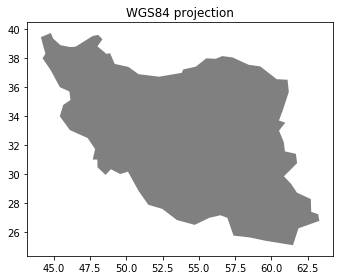

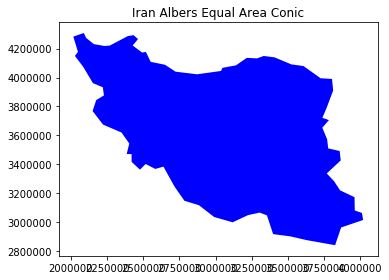

In [91]:
import matplotlib.pyplot as plt

iran.plot(facecolor='gray');
plt.title("WGS84 projection");
plt.tight_layout()

iran_aeac.plot(facecolor='blue');
plt.title("Iran Albers Equal Area Conic");
plt.tight_layout()

In [93]:
iran_aeac['area'] = iran_aeac.area
iran_aeac

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area
107,82021564,Asia,Iran,IRN,1459000.0,"POLYGON ((2476884.994 3362197.251, 2419249.742...",1.617731e+12


In [99]:
#Changing the projection (aeac:LAlbers Equal Area Conic)
asia_aeac = asia.to_crs('esri:102022')
asia_aeac['area'] = asia_aeac.area


In [102]:
# max area in Asia
max_area = asia_aeac['area'].max()
max_area_country = asia_aeac[asia_aeac['area'] == max_area]
max_area_country

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((8830966.738 1957680.656, 87465...",9.409557e+12


In [104]:
# min area in Asia
min_area = asia_aeac['area'].min()
min_area_country = asia_aeac[asia_aeac['area'] == min_area]
min_area_country

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area
160,265100,Asia,N. Cyprus,-99,3600.0,"POLYGON ((814284.674 3889327.439, 821731.576 3...",3.781789e+09


In [106]:
america = world[world['continent'] == "North America"]
#Changing the projection (aeac:Albers Equal Area Conic)
america_aeac = america.to_crs('esri:102022')
america_aeac['area'] = america_aeac.area

In [113]:
# min area in america 
america_min_area = america_aeac['area'].min()
america_min_area

7739070802.055671

In [114]:
america_min_area_country = america_aeac[america_aeac['area'] == america_min_area]
america_min_area_country

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-9030024.359 1100506.354, -8970702.6...",7.739071e+09


In [115]:
# max area in america 
america_max_area = america_aeac['area'].max()
america_max_area

32798065631181.96

In [122]:
america_max_area_country = america_aeac[america_aeac['area'] == america_max_area]
america_max_area_country

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-15635454.718 4602439.378, -15...",3.279807e+13


In [123]:
!pwd

/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework


In [139]:
import pandas as pd
temp = pd.read_csv('/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/Data/non-spatial/GlobalLandTemperatures/GlobalLandTemperaturesByCountry_2000_2013.csv')

temp['name'] = temp['Country']
asia_temp = asia.merge(temp, on='name')

In [142]:
temp.head

<bound method NDFrame.head of                dt  AverageTemperature  AverageTemperatureUncertainty  \
0      2000-01-01               0.197                        407.000   
1      2000-01-01            2404.000                        496.000   
2      2000-01-01           21193.000                        227.000   
3      2000-01-01               0.397                        578.000   
4      2000-01-01              11.260                          0.286   
...           ...                 ...                            ...   
40090  2013-09-01           28991.000                        979.000   
40091  2013-09-01                 NaN                            NaN   
40092  2013-09-01                 NaN                            NaN   
40093  2013-09-01                 NaN                            NaN   
40094  2013-09-01                 NaN                            NaN   

              Country            name  
0               Åland           Åland  
1         Afghanistan    

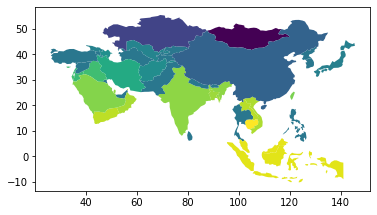

In [135]:
asia_temp_20130601 = asia_temp[asia_temp['dt'] == '2013-02-01'].plot(column='AverageTemperature')

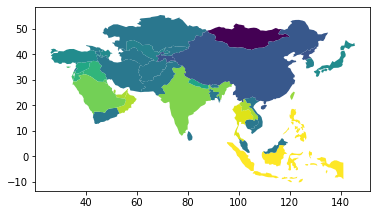

In [144]:
asia_temp_20000201 = asia_temp[asia_temp['dt'] == '2000-12-01'].plot(column='AverageTemperature')

In [152]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
type(cities)
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [155]:
asia.to_file("/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/Data/asia.shp")

In [190]:
# We clip this "cities" dataframe to asia continent
cities_asia = gpd.clip(cities, asia)
cities_asia.tail()
print(type(cities_asia))
n = cities_asia.iloc[[20]]#select one row
print(n)
cities_asia.iloc[38]#Tehran
    

<class 'geopandas.geodataframe.GeoDataFrame'>
          name                   geometry
121  Naypyidaw  POINT (96.11667 19.76850)


name                                            Tehran
geometry    POINT (51.42239817500899 35.6738886270013)
Name: 181, dtype: object

In [159]:
import geopandas as gpd
asia = gpd.read_file("/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/Data/asia.shp")

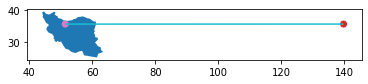

In [196]:
from shapely.geometry import LineString

Iran = asia.loc[asia['name'] == 'Iran', 'geometry'].squeeze()

Tokyo = cities_asia.loc[cities_asia['name'] == 'Tokyo', 'geometry'].squeeze()
Tehran = cities_asia.loc[cities_asia['name'] == 'Tehran', 'geometry'].squeeze()

line = LineString([Tokyo, Tehran])


gpd.GeoSeries([Iran , Tokyo, Tehran , line]).plot(cmap='tab10')

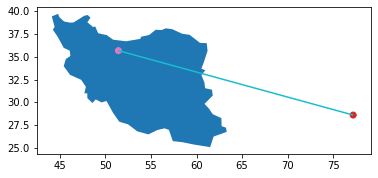

In [199]:
from shapely.geometry import LineString

Iran = asia.loc[asia['name'] == 'Iran', 'geometry'].squeeze()

New_Delhi= cities_asia.loc[cities_asia['name'] == 'New Delhi', 'geometry'].squeeze()
Tehran = cities_asia.loc[cities_asia['name'] == 'Tehran', 'geometry'].squeeze()

line = LineString([New_Delhi, Tehran])


gpd.GeoSeries([Iran , New_Delhi, Tehran , line]).plot(cmap='tab10')

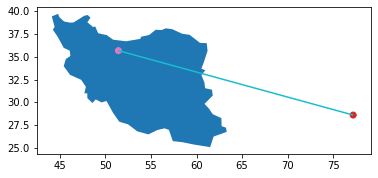

In [241]:
from shapely.geometry import LineString

Iran = asia.loc[asia['name'] == 'Iran', 'geometry'].squeeze()

New_Delhi= cities_asia.loc[cities_asia['name'] == 'New Delhi', 'geometry'].squeeze()
Tehran = cities_asia.loc[cities_asia['name'] == 'Tehran', 'geometry'].squeeze()

line_2 = LineString([New_Delhi, Tehran])


gpd.GeoSeries([Iran , New_Delhi, Tehran , line_2]).plot(cmap='tab10')

In [202]:
Tehran.within(Iran)

True

In [205]:
Iran.contains(Tehran)

True

In [208]:
Iran.contains(Tokyo)

False

In [210]:
New_Delhi.within(Iran)

False

In [214]:
asia.contains(Iran)
asia[asia.contains(Iran)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
30,82021564,Asia,Iran,IRN,1459000.0,"POLYGON ((48.56797 29.92678, 48.01457 30.45246..."


In [217]:
Japan = asia.loc[asia['name'] == 'Japan', 'geometry'].squeeze()
asia.contains(Japan)
asia[asia.contains(Japan)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
42,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ..."


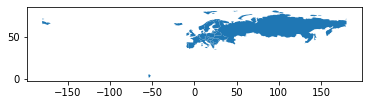

In [234]:
europe = world[ world['continent'] == "Europe"]
europe.plot( )

In [236]:
europe.to_file("/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/Data/europe.shp")

In [237]:
# We clip this "cities" dataframe to europe continent
cities_europe = gpd.clip(cities, europe)
cities_europe.tail()

,name,geometry
184,Vienna,POINT (16.36469 48.20196)
187,London,POINT (-0.11867 51.50194)
190,Moscow,POINT (37.61358 55.75411)
192,Rome,POINT (12.48131 41.89790)
199,Paris,POINT (2.33139 48.86864)


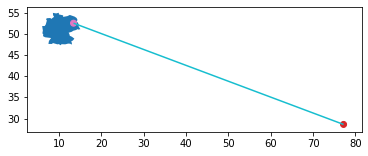

In [240]:
from shapely.geometry import LineString
Germany = europe.loc[europe['name'] == 'Germany', 'geometry'].squeeze()

New_Delhi= cities_asia.loc[cities_asia['name'] == 'New Delhi', 'geometry'].squeeze()
Berlin = cities_europe.loc[cities_europe['name'] == 'Berlin', 'geometry'].squeeze()

line_3 = LineString([New_Delhi, Berlin])


gpd.GeoSeries([Germany , New_Delhi, Berlin , line_3]).plot(cmap='tab10')

In [247]:
#Germany.contains(New_Delhi)
#Berlin.within(Germany)
#Germany.contains(line_3)
line_3.intersects(Germany)

True

In [249]:
type(New_Delhi)

shapely.geometry.point.Point

In [251]:
type(Germany)

shapely.geometry.polygon.Polygon

In [253]:
europe.contains(Japan)
europe[europe.contains(Germany)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
121,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."


In [257]:
Austria = europe[europe['name'] == 'Austria'] 
Austria.touches(Germany)

114    True
dtype: bool

In [259]:
Italy = europe [europe ['name'] == 'Italy']
Italy.touches(Germany)

141    False
dtype: bool

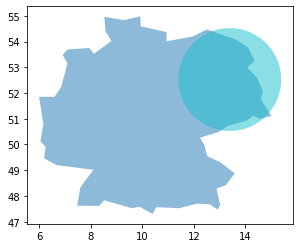

In [261]:
gpd.GeoSeries([Germany, Berlin.buffer(2)]).plot(alpha=0.5, cmap='tab10')

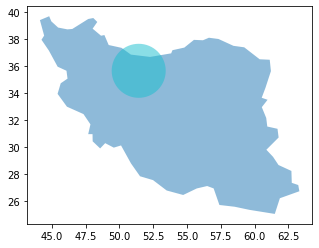

In [263]:
gpd.GeoSeries([Iran, Tehran.buffer(2)]).plot(alpha=0.5, cmap='tab10')

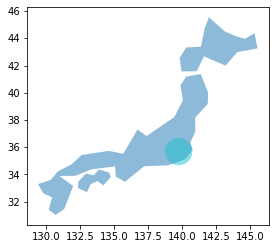

In [266]:
gpd.GeoSeries([Japan, Tokyo.buffer(1)]).plot(alpha=0.5, cmap='tab10')

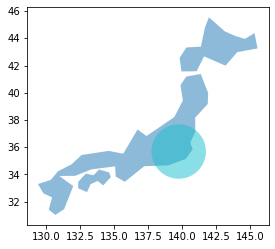

In [267]:
gpd.GeoSeries([Japan, Tokyo.buffer(2)]).plot(alpha=0.5, cmap='tab10')

Austria = europe[europe['name'] == 'Austria']
europe.contains(Austria)
Austria.touches(Germany)